# Exercise 2.5 Handwriting Recgonition

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [4]:
tf.random.set_seed(42)

In [5]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
(X_train, y_train), (X_test, y_test) = hand

In [8]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

C:\Users\wjzak\AppData\Local\Temp\ipykernel_29864\1539957955.py:2: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.arrayprint.
  np.core.arrayprint._line_width = 180000


In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

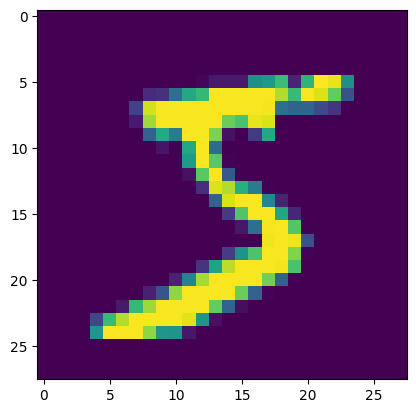

In [12]:
plt.imshow(X_train[0])

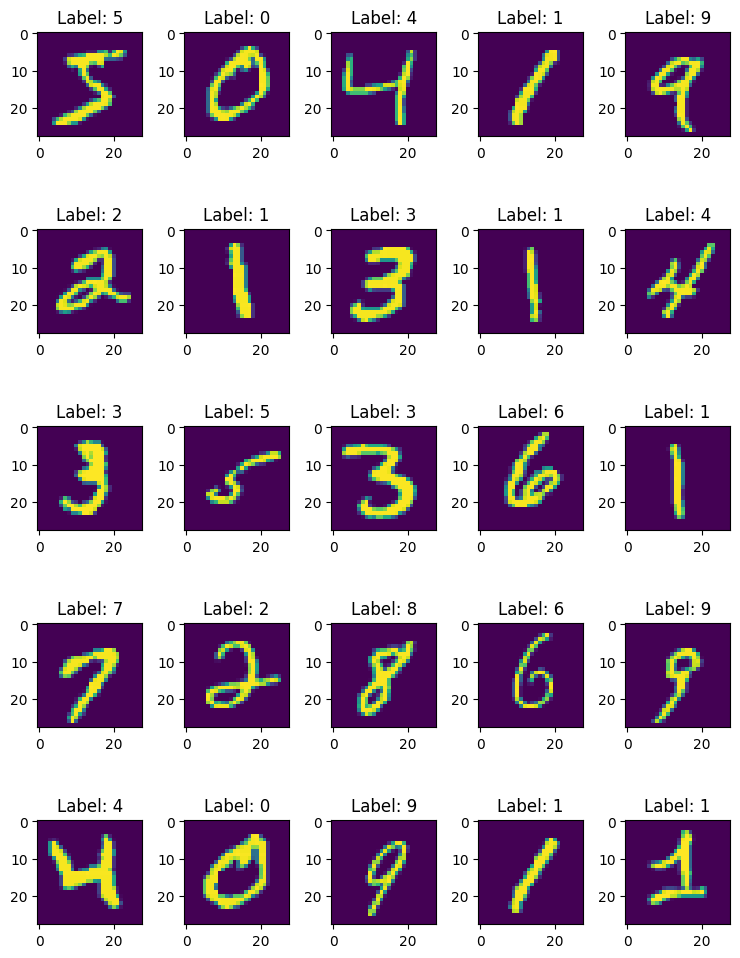

In [13]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [14]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
X_train /= 255
X_test /= 255

In [21]:
# 6. Preprocess class labels
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [22]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

In [23]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [24]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

d:\Virtual Env\my_project_env_pc\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9378 - loss: 0.2014
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9747 - loss: 0.0841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9808 - loss: 0.0645
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9831 - loss: 0.0540
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9852 - loss: 0.0468
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9872 - loss: 0.0412
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9886 - loss: 0.0363
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9900 - loss: 0.0331
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9900 - loss: 0.0315
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9910 - loss: 0.0283


In [26]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9908 - loss: 0.0341


In [27]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[8.15246917e-21, 8.37983722e-14, 2.44836991e-14, 8.30681993e-15,
        4.25776887e-16, 7.37824255e-22, 5.01832879e-25, 1.00000000e+00,
        1.20633256e-21, 1.57024879e-13],
       [3.49806244e-14, 5.25806199e-09, 1.00000000e+00, 3.06624254e-15,
        5.04630202e-16, 1.25559784e-22, 5.14056376e-12, 5.08175485e-14,
        1.82060746e-16, 2.79096393e-21],
       [1.85877840e-14, 1.00000000e+00, 1.05776915e-11, 4.07244282e-16,
        1.15631493e-09, 1.67120625e-12, 1.00348722e-11, 3.65006070e-09,
        2.34795777e-12, 7.54780299e-13],
       [1.00000000e+00, 4.04459669e-13, 9.41815931e-11, 2.77336829e-13,
        1.26541472e-10, 4.79667382e-11, 3.62408272e-08, 1.58005875e-08,
        2.37746229e-11, 9.48407486e-09]], dtype=float32)

In [28]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([1., 1., 1., 1.], dtype=float32)

In [29]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [30]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 972    1    2    0    0    0    4    1    0    0]
 [   0 1131    1    0    0    0    0    3    0    0]
 [   0    2 1023    0    0    0    0    7    0    0]
 [   0    0    3 1002    0    3    0    1    1    0]
 [   0    0    0    0  979    0    1    0    1    1]
 [   0    1    0    2    0  888    1    0    0    0]
 [   2    2    0    0    1    5  948    0    0    0]
 [   0    1    4    0    0    0    0 1022    1    0]
 [   3    1    3    1    0    0    0    5  957    4]
 [   1    0    1    0    7    3    0    9    2  986]]


In [31]:
path = r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 2\01-2026- Analysis\01 Data\Numbers'
path

'C:\\Users\\wjzak\\Dropbox\\Career Foundry\\Data Specialization\\Module 2\\01-2026- Analysis\\01 Data\\Numbers'

In [32]:
img = Image.open(os.path.join(path, '1_Neg.jpg')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

JPEG
(198, 141)
RGB


In [37]:
newsize = (28,28)
img2 = img.convert('L').resize(newsize)  # Convert to grayscale ('L' mode)
img2

In [38]:
testimg = asarray(img2)

In [39]:
print(testimg.shape)

(28, 28)


In [40]:
testimg = testimg.reshape(1, 28, 28, 1)

In [41]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2


In [42]:
# load and preprocess another image
img_b = Image.open(os.path.join(path, '4_Neg.jpg'))  # <-- update filename as needed
img_b2 = img_b.convert('L').resize(newsize)
testimg_b = asarray(img_b2)
print(testimg_b.shape)

testimg_b = testimg_b.reshape(1, 28, 28, 1)

# predict the class for the new image
predict_value_b = model.predict(testimg_b)
digit_b = argmax(predict_value_b)
print(digit_b)

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
8


In [44]:
img_b2

In [43]:
# load and preprocess a third image
img_c = Image.open(os.path.join(path, '9_Neg.jpg'))  # <-- update filename as needed
img_c2 = img_c.convert('L').resize(newsize)
testimg_c = asarray(img_c2)
print(testimg_c.shape)

testimg_c = testimg_c.reshape(1, 28, 28, 1)

# predict the class for the third image
predict_value_c = model.predict(testimg_c)
digit_c = argmax(predict_value_c)
print(digit_c)

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
8


In [45]:
img_c2